<a href="https://colab.research.google.com/github/VishnuSarath/Titanic/blob/main/Titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Load and Display the dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Load and Display------------------------------------------------------------------

# Replace 'your_file.csv' with the path to your data file
file_path = '/content/Titanic Passenger Data.csv'

# Load the data into a pandas DataFrame
df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
print(df.head())

#Dropped Cabin column due to the number of null values - 687
#df.drop('Cabin', axis=1, inplace=True)

   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Cabin Embarked  \
0    male  22.0      1      0         A/5 21171   7.2500   NaN        S   
1  female  38.0      1      0          PC 17599  71.2833   C85        C   
2  female  26.0      0      0  STON/O2. 3101282   7.9250   NaN        S   
3  female  35.0      1      0            113803  53.1000  C123        S   
4    male  35.0      0      0            373450   8.0500   NaN        S   

   Survived  
0         0  
1         1  
2         1  
3         1  
4         0  


# Display statistics and check for missing, duplicate and unrealistic values

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Pclass       891 non-null    int64  
 2   Name         891 non-null    object 
 3   Sex          891 non-null    object 
 4   Age          714 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        204 non-null    object 
 10  Embarked     889 non-null    object 
 11  Survived     891 non-null    int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Summary Statistics:
        PassengerId      Pclass                     Name   Sex         Age  \
count    891.000000  891.000000                      891   891  714.000000   
unique          NaN         NaN               

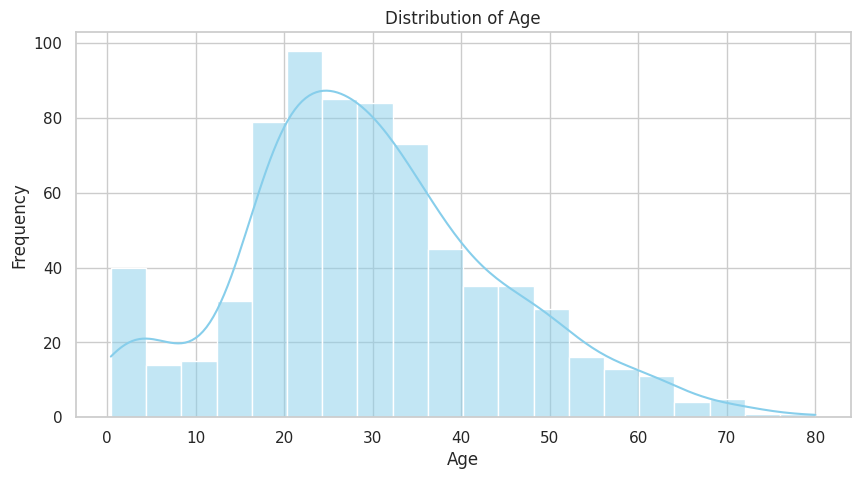

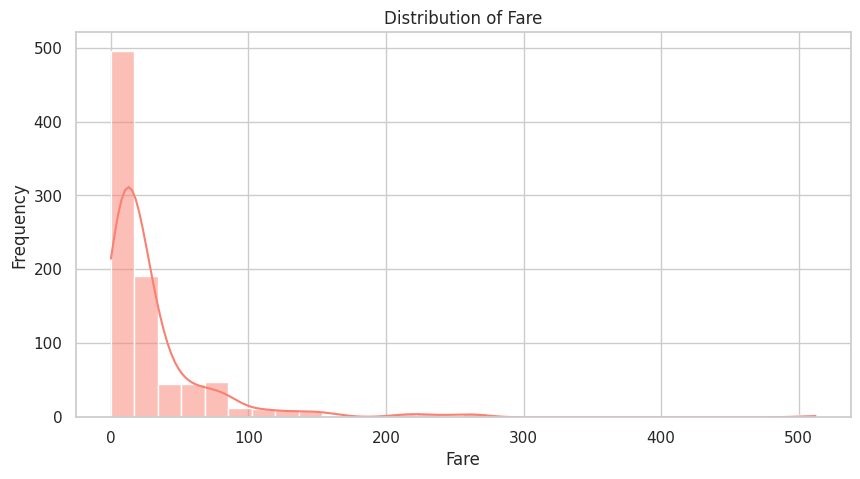

<ipython-input-2-695d3d1d9d97>:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Pclass', palette='Set3')


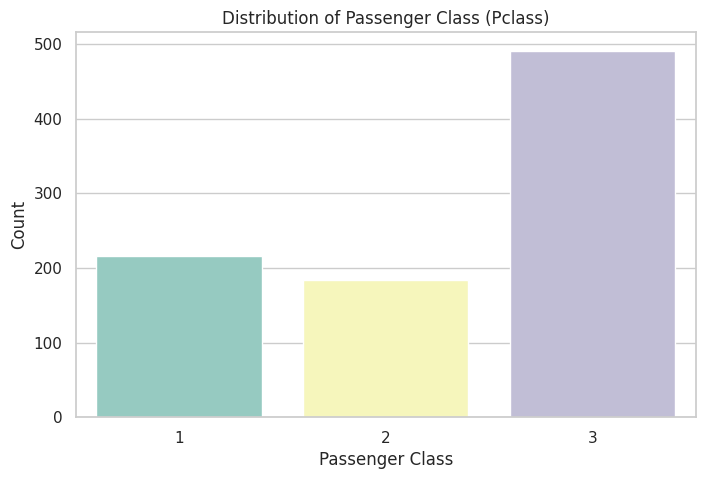

<ipython-input-2-695d3d1d9d97>:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Sex', palette='Set2')


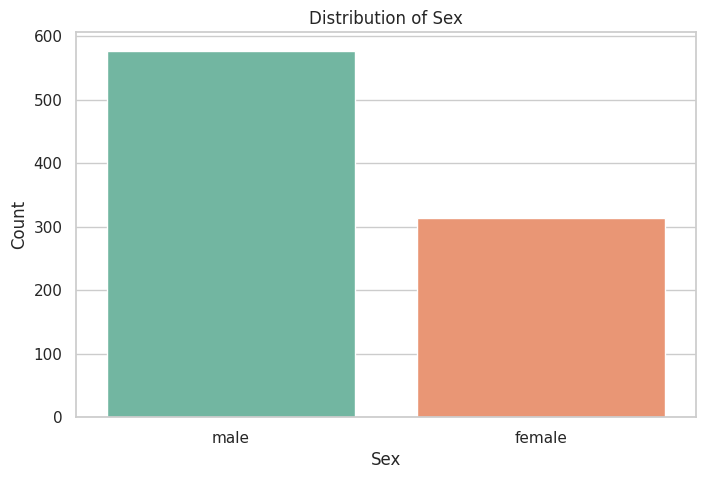

<ipython-input-2-695d3d1d9d97>:71: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Embarked', palette='pastel')


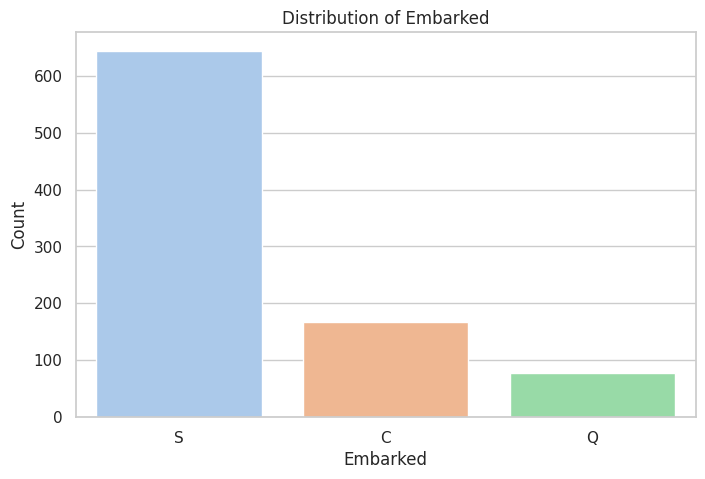

In [2]:
#Display statistics and check for missing, duplicate and unrealistic values----------------------------------------------------------

# Display basic information about the DataFrame
print("DataFrame Info:")
print(df.info())

# Display summary statistics of the DataFrame
print("\nSummary Statistics:")
print(df.describe(include='all'))

# Check for missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

# Check for duplicate entries
duplicates = df.duplicated().sum()
print("\nNumber of Duplicate Rows:", duplicates)

# Check for any negative or zero values in columns where they are not expected
print("\nNegative or zero values in specific columns where they should not exist:")
columns_to_check = ['Age', 'Fare']
for col in columns_to_check:
    negative_or_zero_values = df[df[col] <= 0]
    if not negative_or_zero_values.empty:
        print(f"\n{col} column has negative or zero values:")
        print(negative_or_zero_values[[col]])

# Check for unrealistic age values (e.g., very high or very low)
print("\nUnrealistic age values:")
print(df[(df['Age'] < 0) | (df['Age'] > 100)][['Age', 'Name']])

#Finding Distribution of variables --------------------------------------------------------------------------------

# Set the style of seaborn
sns.set(style="whitegrid")

# Distribution of Age
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Age', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Distribution of Fare
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Fare', bins=30, kde=True, color='salmon')
plt.title('Distribution of Fare')
plt.xlabel('Fare')
plt.ylabel('Frequency')
plt.show()

# Distribution of Pclass (Passenger Class)
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Pclass', palette='Set3')
plt.title('Distribution of Passenger Class (Pclass)')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

# Distribution of Sex
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sex', palette='Set2')
plt.title('Distribution of Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Distribution of Embarked
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Embarked', palette='pastel')
plt.title('Distribution of Embarked')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

# Anomalies and Questions:

**Anomalies:**

A) **Missing Values**

1.   Cabin = 687
2.   Age = 177
3. Embarked = 2

**Questions:**

B)   Fare has 15 **zero values**

C) Some have the **same ticket numbers**




## A1

In [3]:
# A1) Dropping Cabin column-----------------------------------------------------

# Drop the 'Cabin' column
df.drop('Cabin', axis=1, inplace=True)

# Print the updated DataFrame to confirm the 'Cabin' column is dropped
print(df.head())

   PassengerId  Pclass                                               Name  \
0            1       3                            Braund, Mr. Owen Harris   
1            2       1  Cumings, Mrs. John Bradley (Florence Briggs Th...   
2            3       3                             Heikkinen, Miss. Laina   
3            4       1       Futrelle, Mrs. Jacques Heath (Lily May Peel)   
4            5       3                           Allen, Mr. William Henry   

      Sex   Age  SibSp  Parch            Ticket     Fare Embarked  Survived  
0    male  22.0      1      0         A/5 21171   7.2500        S         0  
1  female  38.0      1      0          PC 17599  71.2833        C         1  
2  female  26.0      0      0  STON/O2. 3101282   7.9250        S         1  
3  female  35.0      1      0            113803  53.1000        S         1  
4    male  35.0      0      0            373450   8.0500        S         0  


A1) **Dropped Cabin column** as it has a high percentage of missing values (687 out of 891)

## A2

In [4]:
# A2) Dropping rows with missing Age values

# Drop rows with missing values in the 'Age' column
df = df.dropna(subset=['Age'])

# Print the shape of the DataFrame after dropping missing values
print("Shape of DataFrame after dropping missing values:", df.shape)

Shape of DataFrame after dropping missing values: (714, 11)


A2) **Dropped rows with missing Age values** to ensure complete and reliable data is used in the analysis. The dropped data constitutes a relatively small percentage of the total data (13%)

## A3

In [5]:
# A3) Dropping rows with missing Embarkment values

# Drop rows with missing embarkment values
df = df.dropna(subset=['Embarked'])

# Print the shape of the DataFrame after dropping missing values
print("Shape of DataFrame after dropping missing values:", df.shape)

Shape of DataFrame after dropping missing values: (712, 11)


A3) **2 rows with missing Embarkment values are dropped**. The dropped rows had female passengers with the same ticket number and fare

## B

<ipython-input-6-7b7123e96e32>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fare_zero, x='Pclass', palette='Set3')


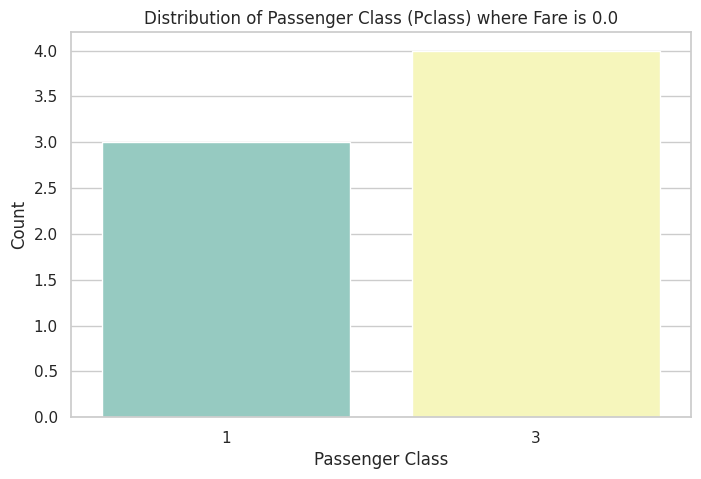

<ipython-input-6-7b7123e96e32>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fare_zero, x='Sex', palette='Set2')


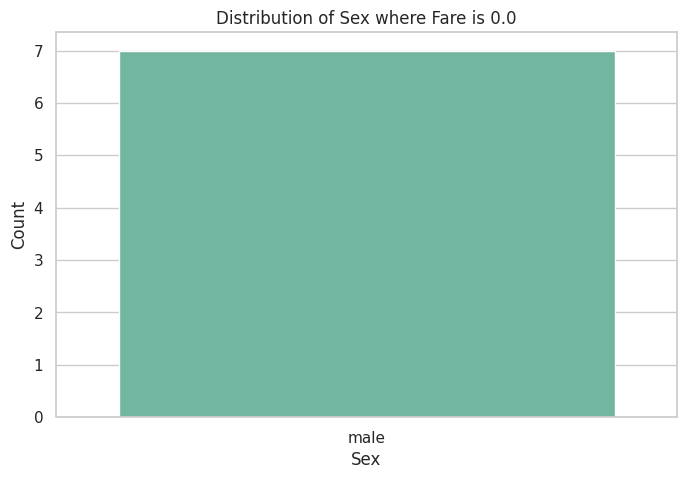

<ipython-input-6-7b7123e96e32>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fare_zero, x='Embarked', palette='pastel')


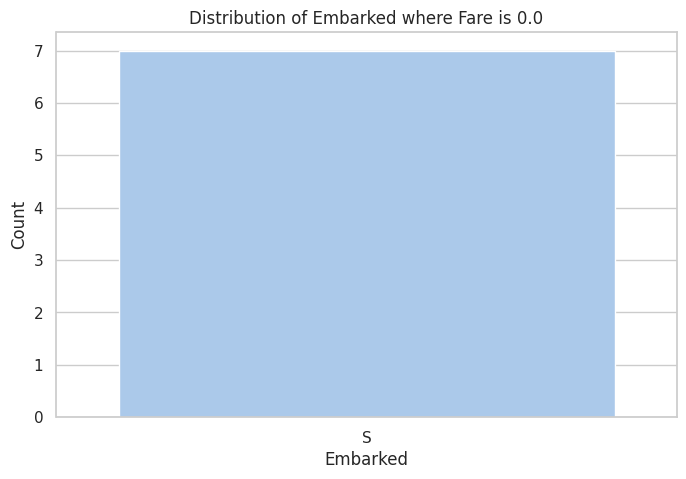

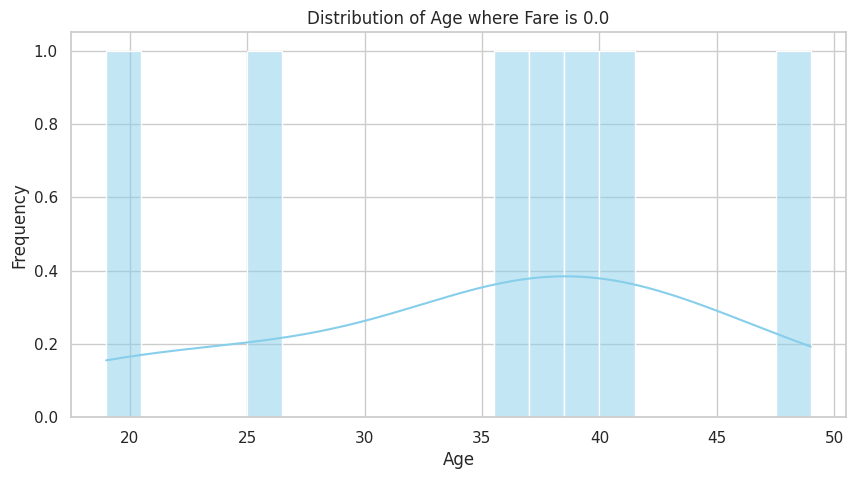

<ipython-input-6-7b7123e96e32>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fare_zero, x='SibSp', palette='muted')


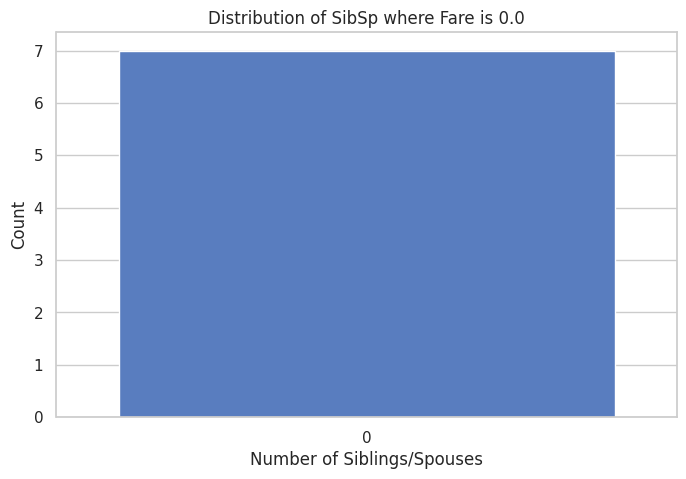

<ipython-input-6-7b7123e96e32>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fare_zero, x='Parch', palette='bright')


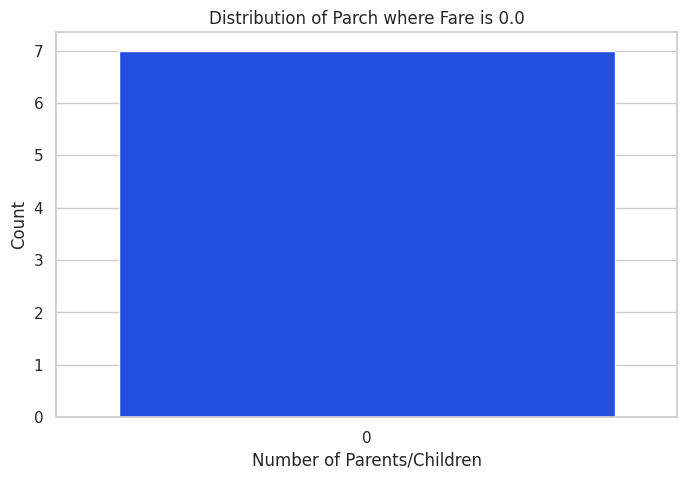

<ipython-input-6-7b7123e96e32>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=fare_zero, x='Survived', palette='coolwarm')


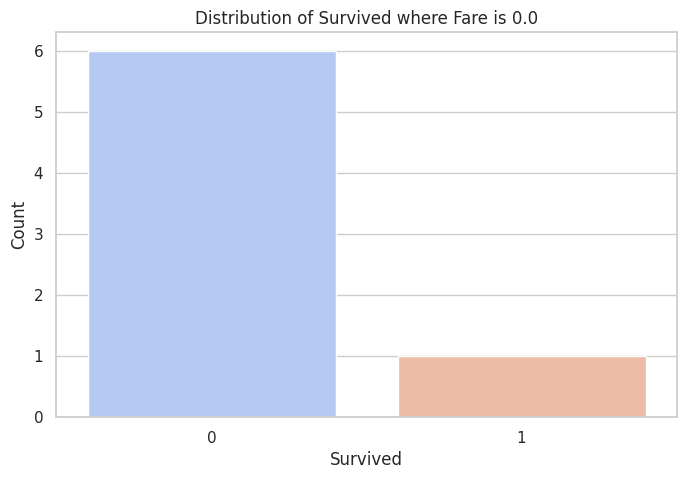

In [6]:
#Investigating rows where fare is zero----------------------------------------

# Filter rows where fare is 0.0
fare_zero = df[df['Fare'] == 0.0]

# Plot distribution of Pclass where fare is 0.0
plt.figure(figsize=(8, 5))
sns.countplot(data=fare_zero, x='Pclass', palette='Set3')
plt.title('Distribution of Passenger Class (Pclass) where Fare is 0.0')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

# Plot distribution of Sex where fare is 0.0
plt.figure(figsize=(8, 5))
sns.countplot(data=fare_zero, x='Sex', palette='Set2')
plt.title('Distribution of Sex where Fare is 0.0')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Plot distribution of Embarked where fare is 0.0
plt.figure(figsize=(8, 5))
sns.countplot(data=fare_zero, x='Embarked', palette='pastel')
plt.title('Distribution of Embarked where Fare is 0.0')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

# Plot distribution of Age where fare is 0.0
plt.figure(figsize=(10, 5))
sns.histplot(data=fare_zero, x='Age', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age where Fare is 0.0')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of SibSp where fare is 0.0
plt.figure(figsize=(8, 5))
sns.countplot(data=fare_zero, x='SibSp', palette='muted')
plt.title('Distribution of SibSp where Fare is 0.0')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Count')
plt.show()

# Plot distribution of Parch where fare is 0.0
plt.figure(figsize=(8, 5))
sns.countplot(data=fare_zero, x='Parch', palette='bright')
plt.title('Distribution of Parch where Fare is 0.0')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Count')
plt.show()

# Plot distribution of Survived where fare is 0.0
plt.figure(figsize=(8, 5))
sns.countplot(data=fare_zero, x='Survived', palette='coolwarm')
plt.title('Distribution of Survived where Fare is 0.0')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

B) **Insights:**

There were **7 passengers whose fare was zero** (following the removal of unwanted rows from the previous steps). Out of which (1) 3 were in the 1st class and 4 were in the 3rd class, (2) all 7 were males, (3) all 7 embarked on Southampton, (4) none had siblings, spouses, parents and children on board with them, and (5) only 1 survived

**Conclusions:**

The most likely explanations for passengers having a fare of zero include:
1.   They could have been crew members or employees of the ship
2.   They might have received complimentary tickets due to special arrangements
3.   They could represent specific cases such as stowaways or workers traveling without a recorded fare

Given the demographic data (all male, no accompanying family, and primarily from Southampton), it suggests these passengers were likely traveling alone and might have been in specific roles or under special circumstances that exempted them from paying the fare.

## C

<ipython-input-7-0af94836984c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=duplicate_tickets, x='Pclass', palette='Set3')


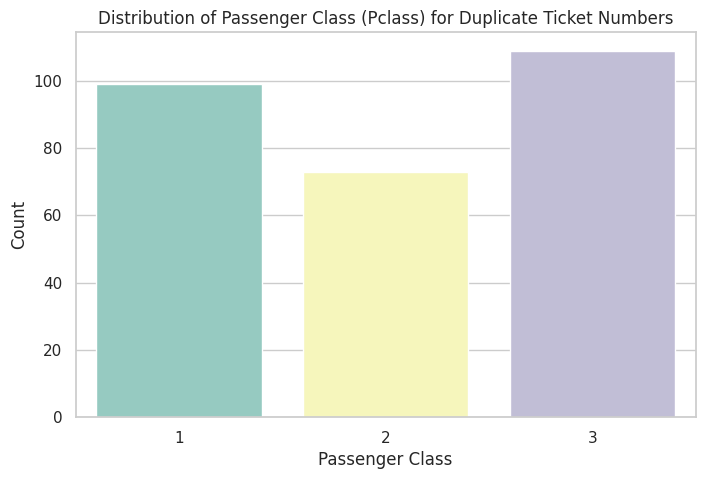

<ipython-input-7-0af94836984c>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=duplicate_tickets, x='Sex', palette='Set2')


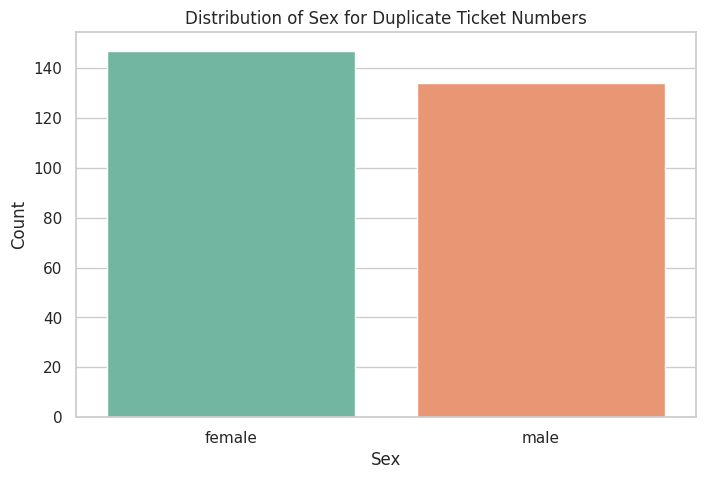

<ipython-input-7-0af94836984c>:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=duplicate_tickets, x='Embarked', palette='pastel')


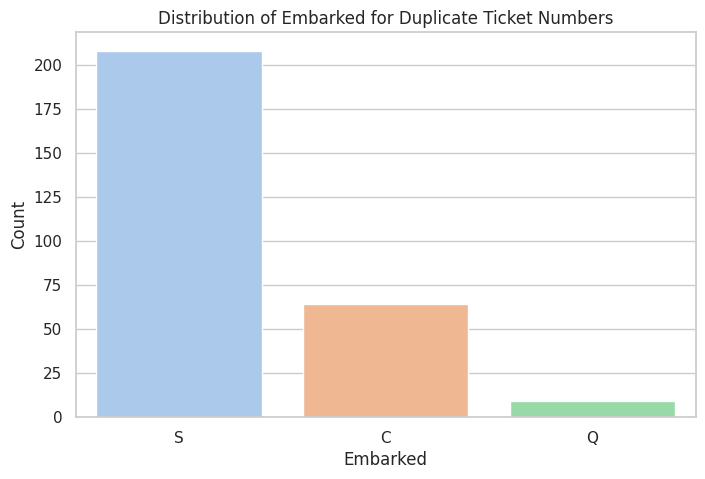

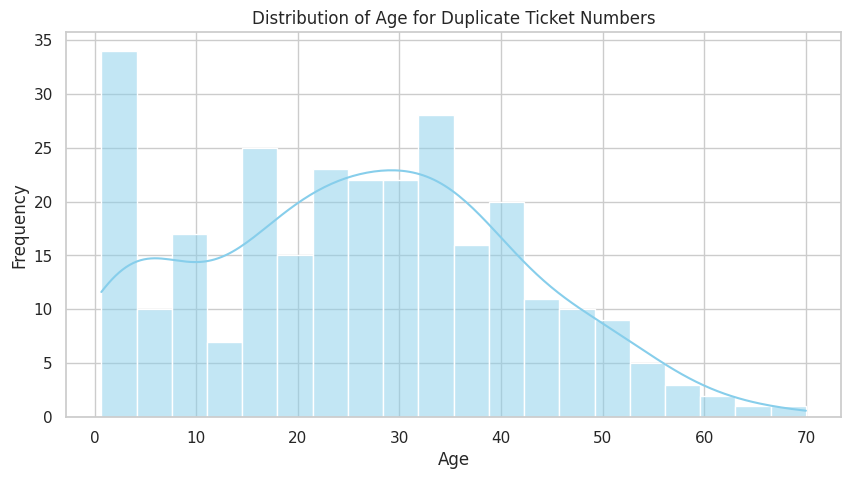

<ipython-input-7-0af94836984c>:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=duplicate_tickets, x='SibSp', palette='muted')


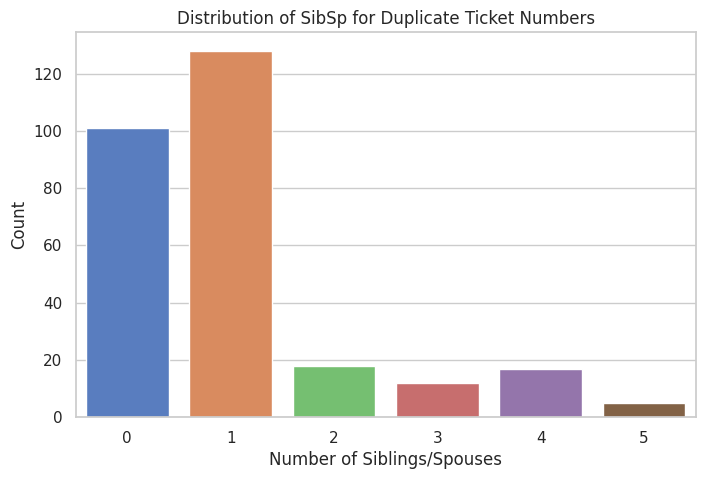

<ipython-input-7-0af94836984c>:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=duplicate_tickets, x='Parch', palette='bright')


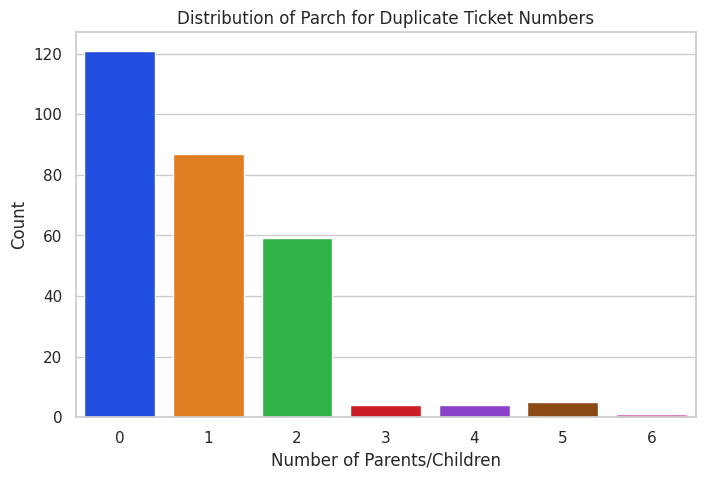

<ipython-input-7-0af94836984c>:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=duplicate_tickets, x='Survived', palette='coolwarm')


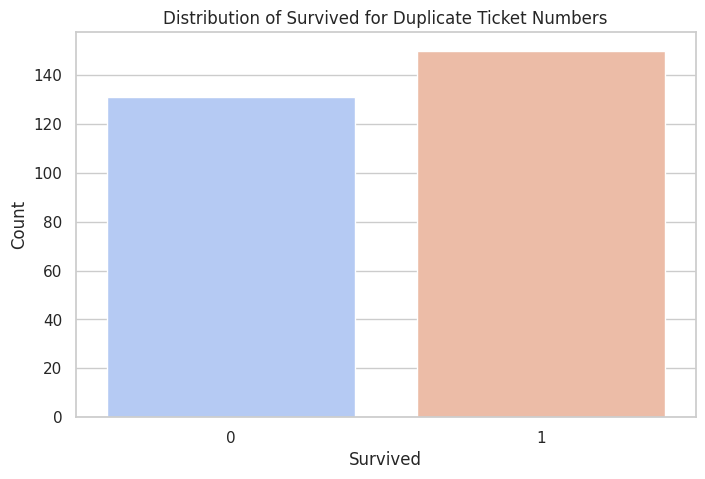

In [7]:
#Investigating rows where ticket numbers are the same----------------------------------------

# Identify duplicate ticket numbers
duplicate_tickets = df[df.duplicated(subset='Ticket', keep=False)]

# Plot distribution of Pclass for duplicate ticket numbers
plt.figure(figsize=(8, 5))
sns.countplot(data=duplicate_tickets, x='Pclass', palette='Set3')
plt.title('Distribution of Passenger Class (Pclass) for Duplicate Ticket Numbers')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

# Plot distribution of Sex for duplicate ticket numbers
plt.figure(figsize=(8, 5))
sns.countplot(data=duplicate_tickets, x='Sex', palette='Set2')
plt.title('Distribution of Sex for Duplicate Ticket Numbers')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Plot distribution of Embarked for duplicate ticket numbers
plt.figure(figsize=(8, 5))
sns.countplot(data=duplicate_tickets, x='Embarked', palette='pastel')
plt.title('Distribution of Embarked for Duplicate Ticket Numbers')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

# Plot distribution of Age for duplicate ticket numbers
plt.figure(figsize=(10, 5))
sns.histplot(data=duplicate_tickets, x='Age', bins=20, kde=True, color='skyblue')
plt.title('Distribution of Age for Duplicate Ticket Numbers')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Plot distribution of SibSp for duplicate ticket numbers
plt.figure(figsize=(8, 5))
sns.countplot(data=duplicate_tickets, x='SibSp', palette='muted')
plt.title('Distribution of SibSp for Duplicate Ticket Numbers')
plt.xlabel('Number of Siblings/Spouses')
plt.ylabel('Count')
plt.show()

# Plot distribution of Parch for duplicate ticket numbers
plt.figure(figsize=(8, 5))
sns.countplot(data=duplicate_tickets, x='Parch', palette='bright')
plt.title('Distribution of Parch for Duplicate Ticket Numbers')
plt.xlabel('Number of Parents/Children')
plt.ylabel('Count')
plt.show()

# Plot distribution of Survived for duplicate ticket numbers
plt.figure(figsize=(8, 5))
sns.countplot(data=duplicate_tickets, x='Survived', palette='coolwarm')
plt.title('Distribution of Survived for Duplicate Ticket Numbers')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

C) The most likely explanations for passengers having the same ticket number include:

1.   **Families** traveling together often purchased a single ticket for all members
2.   **Friends or acquaintances** might have bought a single ticket for the group
3.  Passengers sharing the **same cabin**, especially in third class, could have the same ticket number
4.  **Special group discounts or arrangements** might lead to shared ticket numbers
5.  Some **crew or staff members** might have shared ticket numbers for administrative purposes
6.  Early 20th-century **booking practices** might have resulted in multiple passengers being assigned the same ticket number


# **What factors influenced survival on the Titanic?**

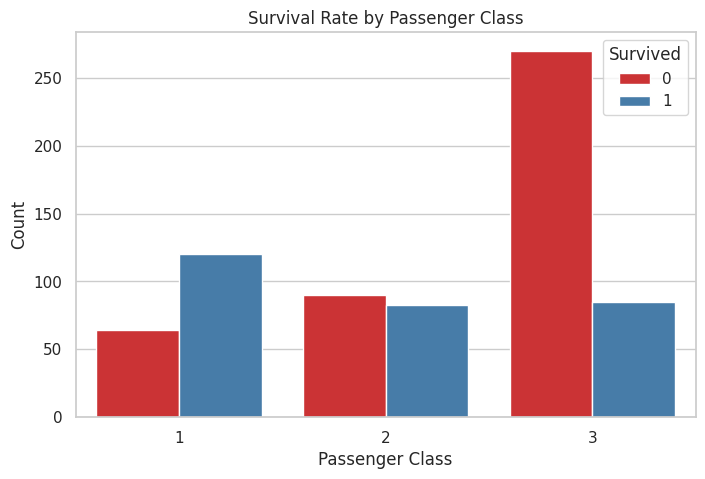

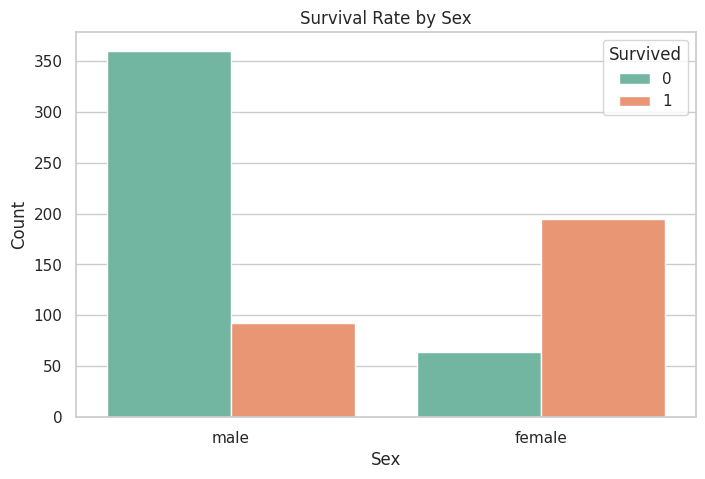

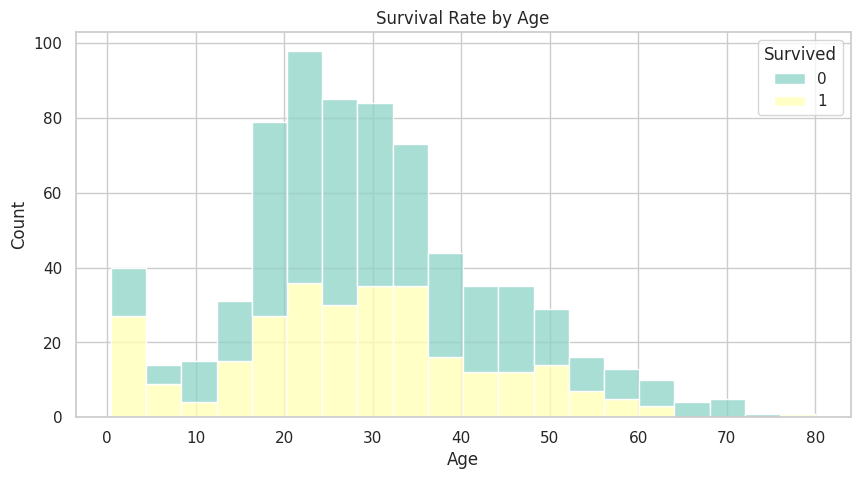

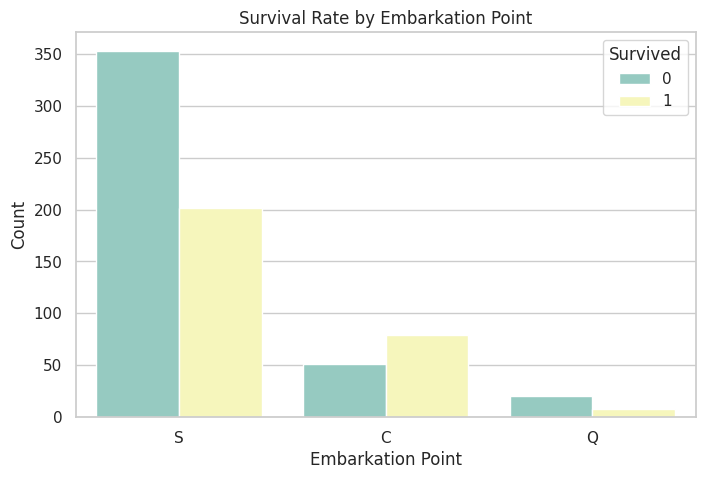

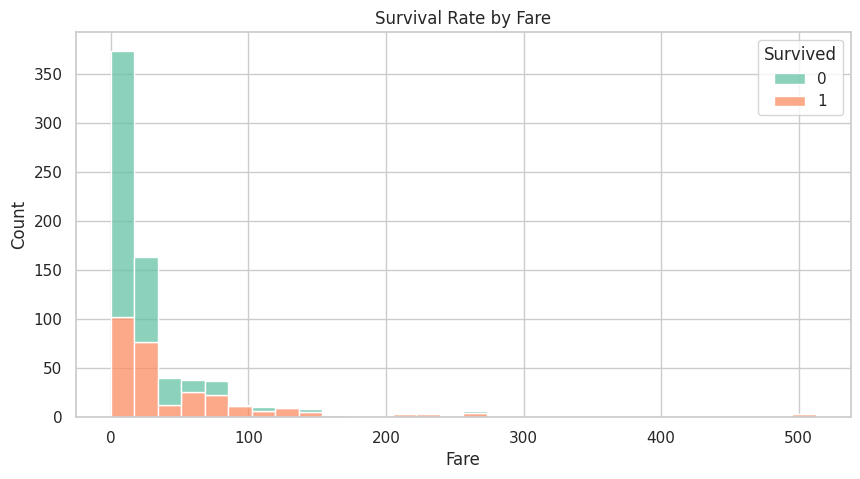

In [8]:
# Visualize the survival rate based on Passenger Class
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Pclass', hue='Survived', palette='Set1')
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.show()

# Visualize the survival rate based on Sex
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Sex', hue='Survived', palette='Set2')
plt.title('Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

# Visualize the survival rate based on Age
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Age', hue='Survived', bins=20, kde=False, palette='Set3', multiple='stack')
plt.title('Survival Rate by Age')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

# Visualize the survival rate based on Embarkation point
plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Embarked', hue='Survived', palette='Set3')
plt.title('Survival Rate by Embarkation Point')
plt.xlabel('Embarkation Point')
plt.ylabel('Count')
plt.show()

# Visualize the survival rate based on Fare
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='Fare', hue='Survived', bins=30, kde=False, palette='Set2', multiple='stack')
plt.title('Survival Rate by Fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show()

In [9]:
# Calculate survival rate based on Passenger Class
survival_rate_pclass = df.groupby('Pclass')['Survived'].mean()* 100
print("Survival Rate by Passenger Class:")
print(survival_rate_pclass)

# Calculate survival rate based on Sex
survival_rate_sex = df.groupby('Sex')['Survived'].mean()* 100
print("\nSurvival Rate by Sex:")
print(survival_rate_sex)

# Calculate survival rate based on Age
age_bins = pd.cut(df['Age'], bins=10)  # Divide Age into 10 bins
survival_rate_age = df.groupby(age_bins)['Survived'].mean()* 100
print("\nSurvival Rate by Age:")
print(survival_rate_age)

# Calculate survival rate based on Embarkation point
survival_rate_embarked = df.groupby('Embarked')['Survived'].mean()* 100
print("\nSurvival Rate by Embarkation Point:")
print(survival_rate_embarked)

# Calculate survival rate based on Fare
fare_bins = pd.cut(df['Fare'], bins=10)  # Divide Fare into 10 bins
survival_rate_fare = df.groupby(fare_bins)['Survived'].mean()* 100
print("\nSurvival Rate by Fare:")
print(survival_rate_fare)


Survival Rate by Passenger Class:
Pclass
1    65.217391
2    47.976879
3    23.943662
Name: Survived, dtype: float64

Survival Rate by Sex:
Sex
female    75.289575
male      20.529801
Name: Survived, dtype: float64

Survival Rate by Age:
Age
(0.34, 8.378]       66.666667
(8.378, 16.336]     41.304348
(16.336, 24.294]    35.593220
(24.294, 32.252]    38.461538
(32.252, 40.21]     43.589744
(40.21, 48.168]     34.285714
(48.168, 56.126]    46.666667
(56.126, 64.084]    34.782609
(64.084, 72.042]     0.000000
(72.042, 80.0]      50.000000
Name: Survived, dtype: float64

Survival Rate by Embarkation Point:
Embarked
C    60.769231
Q    28.571429
S    36.281588
Name: Survived, dtype: float64

Survival Rate by Fare:
Fare
(-0.512, 51.233]       33.275563
(51.233, 102.466]      68.965517
(102.466, 153.699]     71.428571
(153.699, 204.932]    100.000000
(204.932, 256.165]     77.777778
(256.165, 307.398]     66.666667
(307.398, 358.63]            NaN
(358.63, 409.863]            NaN
(409.863, 46

**Insights:**

Passenger Class: **The survival rate decreases as the passenger class increases**. Passengers in first class have the highest survival rate (65.22%), followed by second class (48.00%), and third class passengers have the lowest survival rate (23.94%).

Sex: **Females have a significantly higher survival rate (75.29%)** compared to males (20.53%). This suggests that gender played a significant role in determining survival on the Titanic.

Age: The survival rate varies across different age groups. **Children (aged 0-8 years) had a relatively high survival rate (66.67%)**, while the elderly (aged 64-80 years) had a mixed survival rate, with some age groups having no survivors. This indicates that age might have influenced survival to some extent.

Embarkation Point: **Passengers who embarked from Cherbourg (C) had the highest survival rate (60.77%)**, followed by passengers who embarked from Southampton (S) (36.28%). Passengers who embarked from Queenstown (Q) had the lowest survival rate (28.57%).

Fare: **The survival rate tends to increase with higher fare prices**, indicating that passengers who paid higher fares were more likely to survive. However, there are some missing values and outliers in the fare data, which may affect the interpretation of this result.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Make a copy for regression
reg_df = df.copy()

# Encode categorical variables
reg_df['Sex'] = reg_df['Sex'].map({'male': 0, 'female': 1})
reg_df = pd.get_dummies(reg_df, columns=['Embarked'], drop_first=True)

# Define features and target
X = reg_df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked_Q', 'Embarked_S']]
y = reg_df['Survived']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Evaluate the model
print('Confusion Matrix:')
print(confusion_matrix(y_test, y_pred))
print('\nClassification Report:')
print(classification_report(y_test, y_pred))
print('\nAccuracy Score:')
print(accuracy_score(y_test, y_pred))

# Print model coefficients
coefficients = pd.DataFrame(logreg.coef_[0], X.columns, columns=['Coefficient'])
print(coefficients)

Confusion Matrix:
[[73  7]
 [22 41]]

Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.91      0.83        80
           1       0.85      0.65      0.74        63

    accuracy                           0.80       143
   macro avg       0.81      0.78      0.79       143
weighted avg       0.81      0.80      0.79       143


Accuracy Score:
0.7972027972027972
            Coefficient
Pclass        -1.295956
Sex            2.573763
Age           -0.037577
SibSp         -0.333553
Parch         -0.000321
Fare          -0.000569
Embarked_Q    -0.391718
Embarked_S    -0.221203


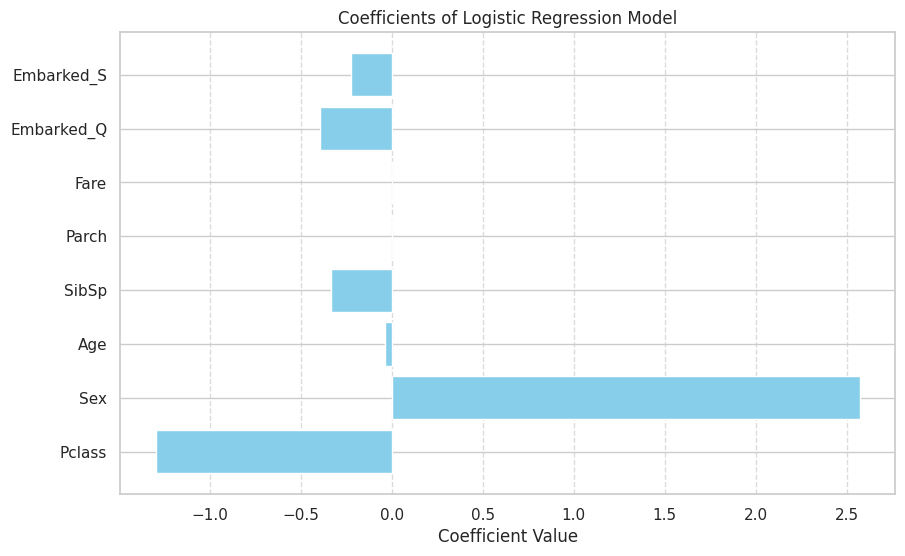

In [11]:
# Define the coefficients
coefficients = {
    'Pclass': -1.295956,
    'Sex': 2.573763,
    'Age': -0.037577,
    'SibSp': -0.333553,
    'Parch': -0.000321,
    'Fare': -0.000569,
    'Embarked_Q': -0.391718,
    'Embarked_S': -0.221203
}

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.barh(list(coefficients.keys()), list(coefficients.values()), color='skyblue')
plt.xlabel('Coefficient Value')
plt.title('Coefficients of Logistic Regression Model')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()

The most influential features in this model are

1.   "**Sex**" (with a coefficient of approximately 2.57)
2.   followed by "**Pclass**" (with a coefficient of approximately -1.30)

This suggests that **being female (Sex = 1) and having a higher class (lower Pclass value)** are associated with **higher chances of survival**

# **What was the average fare paid by passengers in each class?**

Pclass
1    88.048121
2    21.471556
3    13.229435
Name: Fare, dtype: float64


<ipython-input-12-51e6121b5716>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=average_fare_per_class.index, y=average_fare_per_class.values, palette='viridis')


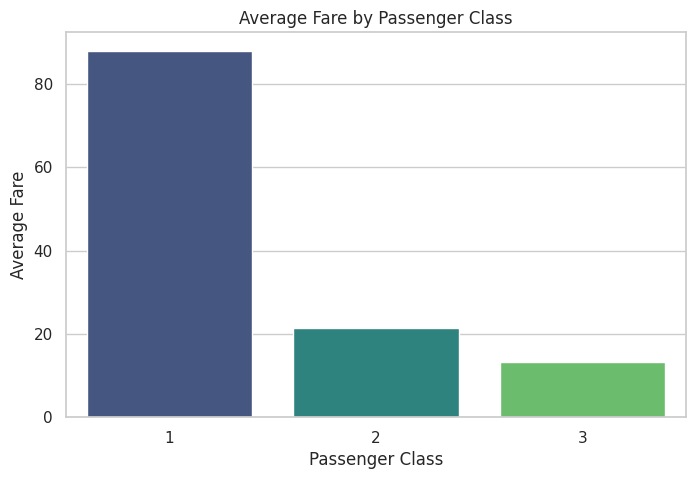

In [12]:
# Calculate the average fare paid by passengers in each class
average_fare_per_class = df.groupby('Pclass')['Fare'].mean()

# Print the average fare per class
print(average_fare_per_class)

# Create a bar plot for average fare per class
plt.figure(figsize=(8, 5))
sns.barplot(x=average_fare_per_class.index, y=average_fare_per_class.values, palette='viridis')
plt.title('Average Fare by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Average Fare')
plt.show()

Passengers in the **1st class paid significantly higher fares on average** compared to passengers in the 2nd and 3rd classes. The average fare for 1st class passengers was 88.05, which is substantially higher than the fares for 2nd class (21.47) and 3rd class (13.23) passengers

# **How many passengers were traveling alone versus with family, and how did this affect survival rates?**

   Alone  Count  Survival Rate
0  False    310       0.516129
1   True    402       0.318408


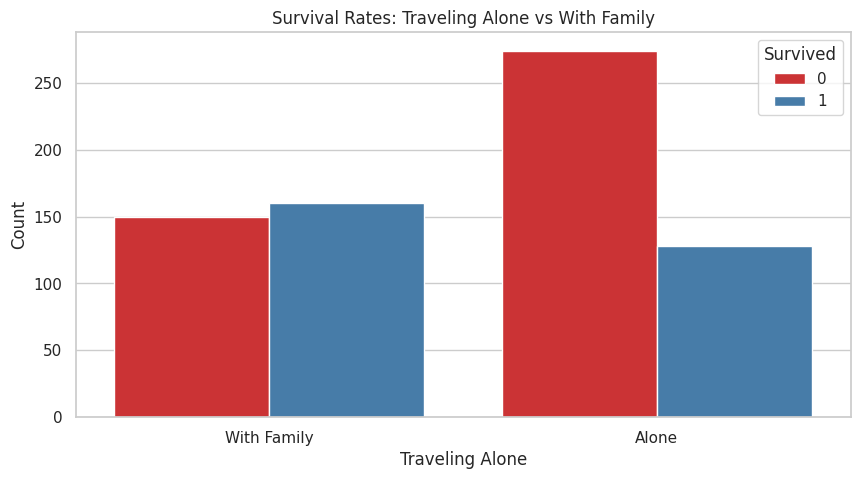

In [13]:
# Create a new column 'FamilySize' which is the sum of SibSp and Parch
df['FamilySize'] = df['SibSp'] + df['Parch']

# Define passengers traveling alone (FamilySize == 0) or with family (FamilySize > 0)
df['Alone'] = df['FamilySize'] == 0

# Calculate the count and survival rates for passengers traveling alone vs with family
alone_vs_family = df.groupby('Alone')['Survived'].agg(['count', 'mean']).reset_index()
alone_vs_family.columns = ['Alone', 'Count', 'Survival Rate']

print(alone_vs_family)

# Plot the results
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Alone', hue='Survived', palette='Set1')
plt.title('Survival Rates: Traveling Alone vs With Family')
plt.xlabel('Traveling Alone')
plt.ylabel('Count')
plt.xticks([0, 1], ['With Family', 'Alone'])
plt.show()

**Insights:**

1. **Higher Survival Rate for Family Travelers:**

Passengers who traveled with family had a significantly higher survival rate (51.6%) compared to those who traveled alone. This suggests that having family members onboard may have increased the likelihood of survival, possibly due to **mutual assistance during the evacuation**.

2. **Lower Survival Rate for Solo Travelers:**

Passengers who traveled alone had a lower survival rate (31.8%), indicating that being alone might have **reduced their chances of receiving help** during the disaster.

3. **Impact of Social Bonds:**

The data suggests that **social bonds and family ties may have played a critical role in survival**, highlighting the importance of mutual support in emergency situations.

# New
